# **Optimising Data Collection**

#### **Group members**
> **Chau**, Alyson (45652765)
<br>**Lee**, Jaye (83765560)
<br>**Nejati**,Koorosh (65809485)
<br>**Sun**, Oakley (48588198)

### **Introduction**

This year, we are presented with a very interesting and fun opportunity, which includes working with data from a Minecraft server. The Pacific Laboratory for Artificial Intelligence, 
PLAI for short, led by Dr. Frank Wood has built a custom Minecraft server to collect real-time data on how individuals play and behave within the game world. However, running the Minecraft server involves real costs, such as software licensing, hardware, and human resources. To make the most of these investments, the team needs to focus on *recruiting players who are most likely to generate a significant amount of usable data*. 
This leads to our central research question: *What skill set and age are most likely to contribute the most data*?
We will use the players.csv file provided to us, which includes data of 197 participants, as well as important information on them for our question such as played hours, age, and skillset. 
Answering this question will help the research team better target their recruitment strategy, ensuring their resources are used effectively while maximizing the amount of high-quality data collected from participants.


**Data description**
\
<u>Dataset used</u>: players.csv (197 rows, 7 cols)
>Column name - *(if numeric)*: max/min/mean
<br>Column name - *(if non-numeric)*: unique value (frequency in data)
<br>&ensp;&ensp;- Ratio of values in data

\+ Game experience - pro (14), veteran (48), regular (36), amateur (63), beginner (35)
<br>&ensp;&ensp;- 7%, 24%, 18%, 32%, 18%
<br>+ Subscribed to game-related newsletter? - yes (144), no (52)
<br>&ensp;&ensp; - 73%, 27%
<br>+ Email study participant used
<br>+ Hours spent on server - 223.1/0/5.84
<br>+ Name of study participant
<br>+ Gender of study participant - male (124), female (37), non-binary (15), prefer not to say (11), agender (2), two-spirited (6), other (1)
<br>&ensp;&ensp;- 63%, 19%, 8%, 6%, 1%, 3%, 0.5%
<br>+ Age of study participant - 50/8/25.5

### **Methods & Results** 

To investigate which age group and skill set are most likely to contribute the most data, we conducted an exploratory analysis using the players.csv dataset. 
We began by loading the necessary libraries and reading in the dataset using the read_csv() function.



In [20]:
# loading libraries and data
library(tidyverse)
library(tidymodels)
player_url <- "https://raw.githubusercontent.com/Jaye136/project_data/refs/heads/main/players.csv"
players_raw <- read_csv(player_url)
head(players_raw)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


After the data was loaded, we performed data wrangling and cleaning by selecting only the relevant columns:experience,played_hours, and age. We then used the filter() function to remove any rows containing missing values to ensure the integrity of subsequent analyses.


In [21]:
# cleaning & wrangling
players_clean <- players_raw |>
select(experience, played_hours, Age) |>#Select columns used
filter(!is.na(experience), !is.na(played_hours), !is.na(Age)) #Remove NA values
head(players_clean)

experience,played_hours,Age
<chr>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
Amateur,0.7,21
Regular,0.1,21
Amateur,0.0,17


Next, we prepared the data for exploratory data analysis. The experience variable was initially as a character and not a categorical variable (factor) so we turned it into factor using as_factor() function and then we converted its categories, which includes Beginner, Amateur, Regular, Veteran, and Pro into a numerical scale from 1 to 5 using fct_recode() and as.numeric() functions. This allowed us to analyze the data using visualizations that need numerical axis. The played_hours variable, which contains a wide range of values, was grouped into six categories based on the hours: minimal (0–1), trial (1–2), session (2–5), casual (5–30), moderate (30–100), and long_term (100+). Since the average number of hours played was around 6 and the maximum was 223 hours, we used narrower intervals for values under 10 hours, where most players are concentrated, and broader intervals for values above 10 hours to capture long-term players. These categories were created to visualize broad time ranges and can be used for identifying trends within these time ranges.

In [22]:
# creating a relavent summary to perform exploratory analysis
# exploratory analysis: can we use age and experience to determine participant playtime?
players_exploratory <- players_clean |>
mutate(experience = fct_recode(as_factor(experience),
                               "5" = "Pro",
                               "4" = "Veteran",
                               "3" = "Regular",
                               "2" = "Amateur",
                               "1" = "Beginner")) |>
mutate(experience = as.numeric(experience))

players_exploratory$played_range_hrs <- cut(players_exploratory$played_hours, breaks = c(0, 1, 2, 5, 30, 100, Inf),
                            right = FALSE,
                           labels = c("minimal", "trial", "session", "casual", "moderate", "long_term"))

players_exploratory <- players_exploratory |>
select(experience, Age, played_range_hrs)
head(players_exploratory)

experience,Age,played_range_hrs
<dbl>,<dbl>,<fct>
1,9,moderate
2,17,session
2,17,minimal
3,21,minimal
4,21,minimal
3,17,minimal


For the visualization of the dataset, we used ggplot to create a scatterplot. Our plot shows player age against skill level with different colors representing different categories of played_hours. This plot (Figure 1) helped us visually assess whether certain skill levels and age groups were associated with higher contribution. Also in order to better the presentation quality, aesthetic qualities such as plot size, point size, transparency (alpha), and text size were adjusted and we made sure to use colorblind friendly pallete so it is accesible. We chose a scatterplot instead of a barplot because it would be hard to see the axis values for age ;In the bar plot if they were stacked, it would be hard to interpret exact information, and if count/identity type, it would be inaccurate.

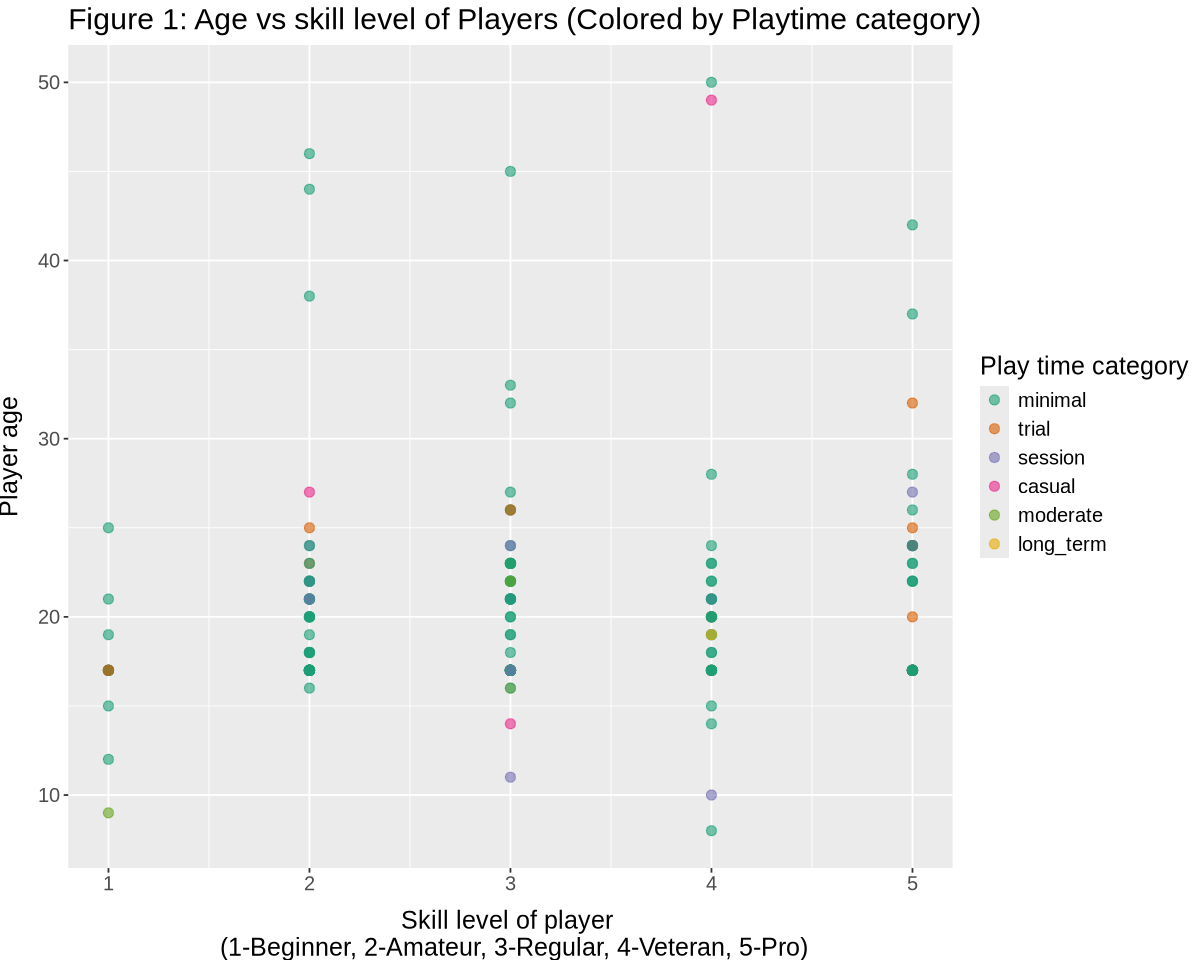

In [27]:
# visualising relevent parts of the data for exploratory analysis
options(repr.plot.height = 8, repr.plot.width = 10)
players_exploratory_vis <- players_exploratory |>
ggplot(aes(x = experience, y = Age, colour = played_range_hrs)) +
geom_point(size = 2.5, alpha = 0.6) +
scale_colour_brewer(palette = "Dark2") +
theme(text = element_text(size = 15), axis.title.x = element_text(vjust = -1), axis.title.y = element_text(vjust = 3), plot.title = element_text(vjust = 1)) +
labs(x = "Skill level of player \n (1-Beginner, 2-Amateur, 3-Regular, 4-Veteran, 5-Pro)",
    y = "Player age", title = "Figure 1: Age vs skill level of Players (Colored by Playtime category)", colour = "Play time category")
players_exploratory_vis

note: If the colors of some points on Figure 1 look weird, it is because of the over laying of colors(so multiple colors are shown at the same time), we tried using shapes but it made it worse and we (and a TA) couldn't find a way to fix it.


For our actual predictive data analysis,we built a regression model to analyze which demographic was most likely to contribute the most playtime. We used the cleaned data and trained a K-nearest neighbors regression model with played_hours as the target and both Age and experience as predictors. We used cross-validation to select the best number of neighbors (k), which was found to be 2 neighbors.

In [28]:
# performing data analysis
# what age and experience provides the most playtime?

# for reproducibility
set.seed(2025)

# choosing a k for the model
players_analysis <- players_clean |>
mutate(experience = fct_recode(as_factor(experience),
                               "5" = "Pro",
                               "4" = "Veteran",
                               "3" = "Regular",
                               "2" = "Amateur",
                               "1" = "Beginner")) |>
mutate(experience = as.numeric(experience))

players_split <- initial_split(players_analysis, prop = 0.75, strata = played_hours)
plyr_train <- training(players_split)
plyr_test <- testing(players_split)

plyr_tune_model <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_mode("regression") |>
set_engine("kknn")

plyr_recipe <- plyr_train |>
recipe(played_hours ~ Age + experience) |>
step_scale(all_predictors()) |>
step_center(all_predictors())


plyr_vfold <- vfold_cv(plyr_train, v = 4, strata = played_hours)
plyr_ktest <- tibble(neighbors = seq(1, 5, 1))

plyr_k_fitflow <- workflow() |>
add_recipe(plyr_recipe) |>
add_model(plyr_tune_model) |>
tune_grid(resamples = plyr_vfold, grid = plyr_ktest) |>
collect_metrics() |> 
filter(.metric == "rmse") |>
slice_min(mean) |> 
pull(neighbors)

Using the selected value of k (best k), we fit the final model and evaluated its performance by calculating the RMSE on the training set and the RMSPE on the testing set. These metrics helped us understand both the model’s accuracy on known data and its ability to predict new data.

In [29]:
# finding error (individual participant variance from the 'average' of their demographic)
plyr_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = plyr_k_fitflow) |>
set_mode("regression") |>
set_engine("kknn")

plyr_fitflow <- workflow() |>
add_recipe(plyr_recipe) |>
add_model(plyr_spec) |>
fit(plyr_train)

# RMSE
plyr_rmse <- plyr_fitflow |>
predict(plyr_train) |>
bind_cols(plyr_train) |>
metrics(truth = played_hours, estimate = .pred) |>
filter(.metric == "rmse") |>
pull(.estimate)

plyr_rmse

# RMSPE
plyr_rmspe <- plyr_fitflow |>
predict(plyr_test) |>
bind_cols(plyr_test) |>
metrics(truth = played_hours, estimate = .pred) |>
filter(.metric == "rmse") |>
pull(.estimate)

plyr_rmspe

[1] 30.05864

[1] 15.66515

In our results, the model achieved an RMSE of 30.06 on the training data and an RMSPE of 15.66 on the testing data. This indicates that while the model performs reasonably well on the training set, its predictions on new data are more accurate. The lower RMSPE suggests the model generalizes effectively to unseen player demographics which makes it reliable for estimating who contributes the most playtime.

We then created a tibble of different demographic combinations based on age(with increments of 10) and skill level to use as test cases in our model. The model predicted how much data each demographic would likely contribute.

In [30]:
# using the model to predict the playtime per demographic (based on age and experience)
player_demographics <- tibble(Age = c(10,10,10,10,10, 20,20,20,20,20, 30,30,30,30,30, 40,40,40,40,40, 50,50,50,50,50),
                              experience = c(1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5))

pred_demographic_playtime <- plyr_fitflow |>
predict(player_demographics) |>
bind_cols(player_demographics) |>
mutate(played_hours = .pred) |> select(-.pred)

# what demographic has the highest playtime/gives the most data?
most_play <- pred_demographic_playtime |>
slice_max(played_hours, n = 3)
most_play

Age,experience,played_hours
<dbl>,<dbl>,<dbl>
10,2,16.60
10,1,15.15
10,3,10.05


Finally we visualized the predicted playtime of each demographic using a grouped bar plot, which showed that *recruiting participants around the age of 10 with amateur experience will generate the most data*.

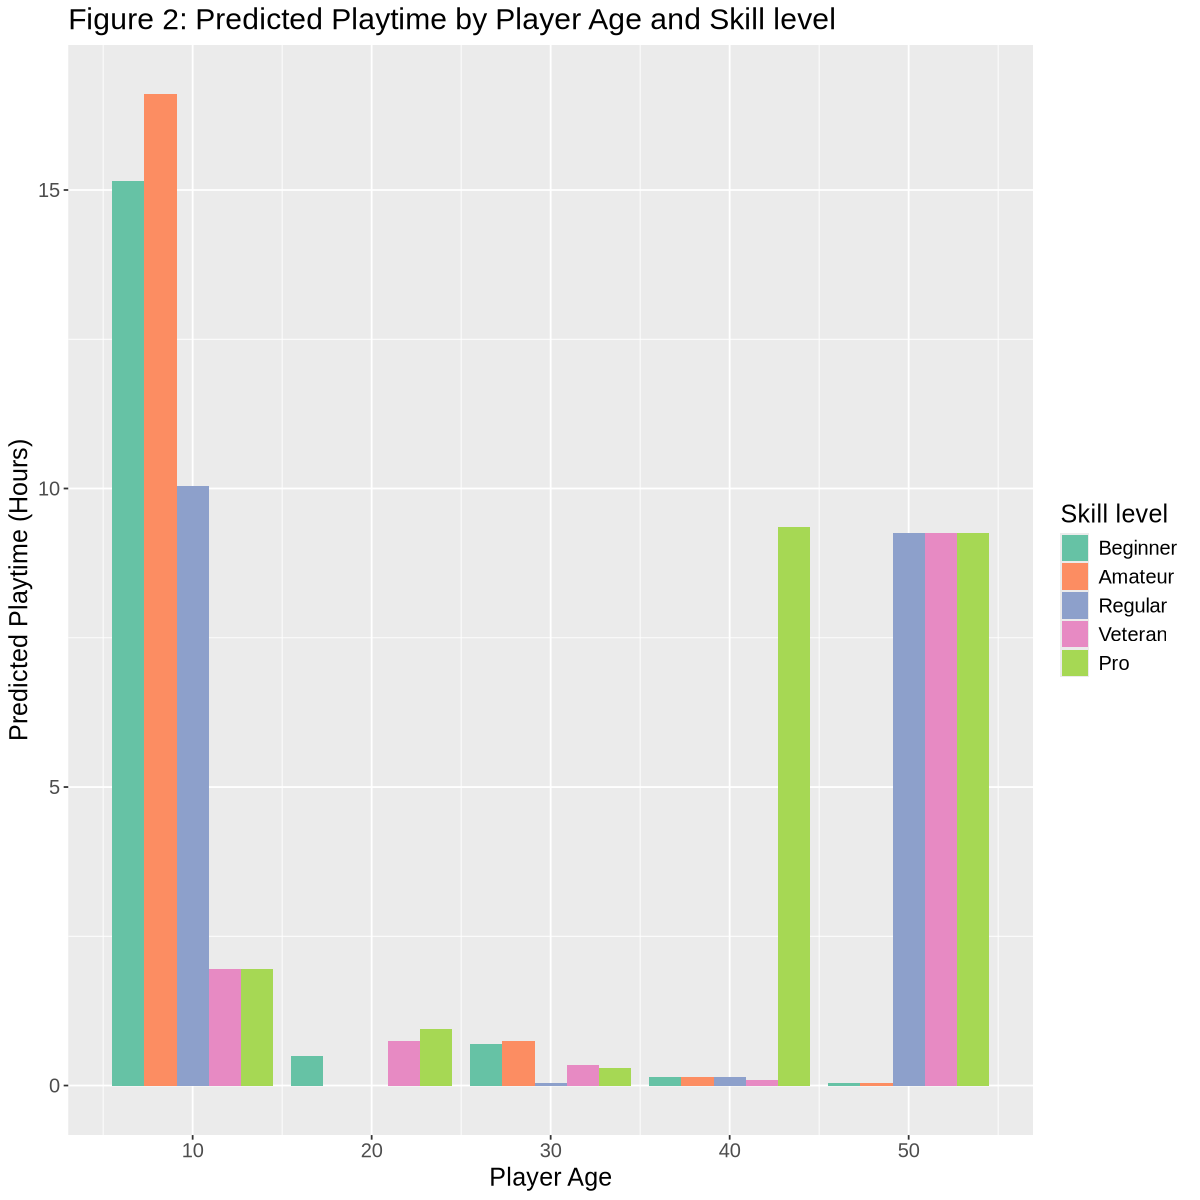

In [31]:
# visualise the data analysis
options(repr.plot.height = 10, repr.plot.width = 10)
player_demo_graph <- pred_demographic_playtime |>
mutate(experience = as.factor(experience)) |>
mutate(experience = fct_recode(as_factor(experience),
                               "Pro" = "5",
                               "Veteran" = "4",
                               "Regular" = "3",
                               "Amateur" = "2",
                               "Beginner" = "1")) |>
ggplot(aes(x = Age, y = played_hours, fill = experience)) + 
geom_bar(stat = "identity", position = "dodge") +
labs(title = "Figure 2: Predicted Playtime by Player Age and Skill level",
    x = "Player Age",
    y = "Predicted Playtime (Hours)",
    fill = "Skill level")+
scale_fill_brewer(palette = "Set2")+
theme(text=element_text(size=15))
player_demo_graph

note: In our visualizations, we aimed to have effective and clear plots with colorblind friendly colors and clear axis name and legend.

### **Discussion**

<u>What we found</u>: <br>
We found that players around the age of 10 with the self-declared skill level of “amateur” had the most playtime with an average of 16.60 hours. This indicated that players of these parameters have contributed the most data in terms of played-hours to PLAI’s project. Notably, the second and third highest contributors were also around the age of 10 with “beginners” averaging 15 hours, and “regulars” averaging around 10 hours. The second highest contributing age group was those around the age of 50 ranging from skill levels of “regulars” to “pros” averaging 8 hours of play time. Additionally, we found that players in the age demographics of young to mature adults grouped in the 20s and 30s contributed the least amount of data. Interestingly, players around the age of 40 did not have many overall hours contributed to the dataset, however players around the age of 40 with the skill “pro” contributed an average of approximately 8 hours. 

<br><u>What we expected?</u>: <br>
We had initially anticipated that age groups with lower levels of responsibility, and more free time, would be able to allocate more hours towards playing. Specifically, those whose ages fell within the grade-school demographic, and those that were around the age of retirement. This aligned with our findings through the analysis of this dataset, as the top contributing age groups consisted of those around the ages of 10 and 50. Additionally, we had anticipated that higher self-documented levels of experience would contribute more hours, as skill level would correlate to hours played to develop their skill. However, we found that those who were of a lower skill-set typically contributed more playing hours as compared to those that considered themselves of a higher skill level. This may be attributed to differences in mindset between players who were younger, where older players may have set higher self-expectations, whereas those that were younger may have been driven solely by fun and enjoyment.

<br><u>Effects of findings</u>:<br>
Understanding the key demographic that contributes the most data, PLAI may be able to apply age-specific advertising and recruitment to further build on their dataset. Knowing that those around the age of 10 with less self-declared levels of skill, PLAI could implement specific word choice such as “no skill required” to further encourage participation. Additionally, focused advertising on media sites that are frequented by this age demographic such as Youtube, specifically targeting audiences that visit, watch, and interact with child-friendly Minecraft channels and YouTube Kids, may increase overall enrollment of active players. To further encourage participant sign-ups, PLAI could potentially explore ways to make the server more family-friendly and educational, and advertise as such to parents of children within this age demographic. 
Attracting older age groups may consist of advertising on social media such as TikTok, Reddit, and Discord. Moreover, creating incentives to play and contribute more hours may attract many teenagers, as they are more likely to seek mutually beneficial interactions. Free incentives could include volunteer hours and the ability to include their participation. As the targeted age demographic would be around those who are in secondary school, students have recently become of age to apply for jobs, and or universities, where resume building and volunteer hours are essential.
	They can also target their resources by knowing which ages contribute the most. For example, since they are a younger age, they won’t have as many responsibilities compared to older adults, so they can have advertising and have more server resources at 3 PM to 12PM due to school and early sleep schedules. This way server resources and efforts are not wasted on times when their top demographics are not contributing.
    
<br><u>Future questions</u>: <br>
With a better understanding of their top-contributors in terms of played hours, the study could be further evaluated surrounding this target demographic. With more data input, predictive questions such as what interactions with the server are more likely to result in more hours played could be explored. Additionally, assessment of how play between different age groups varies may allow for adjustments in the server to attract a larger age range of players. Increased amounts of data may also spark exploration in topics other than data-analysis, but also incorporate other fields such as psychology to better understand why those who range in age around 20s-30s may contribute much less hours played regardless of responsibilities.

### **References**

Pacific Labratory for Artificial Intelligence (PLAI). (2025). *PLAICRAFT Player Data*, [Dataset]. UBC Department of Statistics. https://canvas.ubc.ca/courses/153254/files/37600949?wrap=1

Converting range of values to categories: “Cut Function” RDocumentation, www.rdocumentation.org/packages/base/versions/3.6.2/topics/cut. Accessed 2 Apr. 2025.

### **Scratch work**

In [32]:
# This section includes nothing that needs to be marked. It is for the reproducibility of the data descriptions.

In [33]:
# information about players.csv
ncol(players_raw)
nrow(players_raw)

# information about game experience
filter(players_raw, experience == "Pro") |> nrow()
filter(players_raw, experience == "Veteran") |> nrow()
filter(players_raw, experience == "Regular") |> nrow()
filter(players_raw, experience == "Amateur") |> nrow()
filter(players_raw, experience == "Beginner") |> nrow()

# subscribed to newsletter?
filter(players_raw, subscribe == TRUE) |> nrow()
filter(players_raw, subscribe == FALSE) |> nrow()

# information about hours spent on server
slice_max(players_raw, played_hours, n = 1) |> distinct(played_hours) |> pull()
slice_min(players_raw, played_hours, n = 1) |> distinct(played_hours) |> pull()
summarise(players_raw, avg_play = mean(played_hours, na.rm = TRUE)) |> pull()

# information about player genders
filter(players_raw, gender == "Male") |> nrow()
filter(players_raw, gender == "Female") |> nrow()
filter(players_raw, gender == "Non-binary") |> nrow()
filter(players_raw, gender == "Prefer not to say") |> nrow()
filter(players_raw, gender == "Agender") |> nrow()
filter(players_raw, gender == "Two-Spirited") |> nrow()
filter(players_raw, gender == "Other") |> nrow()

# information about ages of participants
slice_max(players_raw, Age, n = 1) |> distinct(Age) |> pull()
slice_min(players_raw, Age, n = 1) |> distinct(Age) |> pull()
summarise(players_raw, avg_age = mean(Age, na.rm = TRUE)) |> pull()

[1] 7

[1] 196

[1] 14

[1] 48

[1] 36

[1] 63

[1] 35

[1] 144

[1] 52

[1] 223.1

[1] 0

[1] 5.845918

[1] 124

[1] 37

[1] 15

[1] 11

[1] 2

[1] 6

[1] 1

[1] 50

[1] 8

[1] 20.52062